In [1]:
import scipy.stats as stats
from math import sqrt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#pip install matplotlib==3.5.2

#EXERCISE 1.
 The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [2]:
alpha=0.01
x_bar =12.20
n = 40
sigma = 2.50
mu = 13.20
alpha=0.01

In [3]:
z = (x_bar-mu)/(sigma/np.sqrt(n))
z

-2.5298221281347035

In [4]:
pvalue = 1-stats.norm.cdf(-z)## one tailed left ??
pvalue

0.005706018193000872

In [5]:
pvalue = stats.norm.sf(abs(z))#cdf cumulative distribution function
pvalue

0.005706018193000826

In [6]:
if pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


In [ ]:
## pvalue<α = .01 
# We are 99 percent sure that the company is paying significanly lower wages to those 40 employees.

0.005706018193000826

#EXERCISE 2.
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [20]:
soil=pd.read_excel('/content/drive/MyDrive/soil(1).xlsx')

In [24]:
df1=soil.copy()

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [26]:
df1.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


In [27]:
t_score = stats.ttest_ind_from_stats(df1.Soil1.mean(), df1.Soil1.std(), df1.Soil1.shape[0],  # Hypothesis Testing with Welch's t-test in Python paired samples ttest with different sample sizes
                              df1.Soil2.mean(), df1.Soil2.std(), df1.Soil2.shape[0], 
                               equal_var=False);
t_score ##https://codingdisciple.com/hypothesis-testing-welch-python.html

Ttest_indResult(statistic=5.391459474793759, pvalue=9.553102180963316e-07)

In [29]:
df1.isnull().sum()

Soil1    5
Soil2    0
dtype: int64

In [30]:
soil = soil[["Soil1", "Soil2"]].dropna()# we hav nan values that we should drop

In [31]:
soil.describe()

,Soil1,Soil2
count,30.000000,30.000000
mean,1.691800,1.407633
std,0.206903,0.221512
min,1.110000,1.053000
25%,1.572000,1.216500
50%,1.675000,1.376000
75%,1.865250,1.553250
max,2.054000,1.878000


In [33]:
soil.isnull().sum()

Soil1    0
Soil2    0
dtype: int64

In [ ]:
#sns.boxplot(df1.Soil1)

In [ ]:
#sns.boxplot(df1.Soil2);

In [ ]:
mu=1.691800
x_bar=1.417114
n1=30
n2=30
s1=0.206903
s2=0.219184

In [34]:
indTest=stats.ttest_ind(soil.Soil1, soil.Soil2)
indTest.statistic

5.134893443609086

In [35]:
p_value=indTest.pvalue
p_value

3.4402046436336477e-06

In [36]:
alpha=0.01
if p_value < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


The avarage shear strength of Soil2 (1.69) is not significantly diffrent from that of Soil1 (1.40).We are 99% sure to make this conclusion(t(35)=5.13; p=3.44)).

#EXERCISE 3.
The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

    Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
    Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [37]:
df2=pd.read_csv('/content/drive/MyDrive/2015 PISA Test - Sheet1.csv', header=0,  na_filter = False)

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          70 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [39]:
df2.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


In [40]:
df2.Continent_Code.value_counts(all)

EU    0.528571
AS    0.242857
SA    0.100000
NA    0.071429
OC    0.028571
AF    0.028571
Name: Continent_Code, dtype: float64

In [ ]:
#df2.groupby('Continent_Code').describe() 

In [41]:
EU=df2[df2["Continent_Code"] == "EU"].describe()
EU

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [42]:
AS=df2[df2["Continent_Code"] == "AS"].describe()
AS

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [43]:
SA=df2[df2["Continent_Code"] == "SA"].describe()
SA

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [44]:
OC=df2[df2["Continent_Code"] == "OC"].describe()
OC

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [45]:
AF=df2[df2["Continent_Code"] == "AF"].describe()
AF

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [47]:
NA=df2[df2["Continent_Code"] == "NA"].describe()
NA

,internet_users_per_100,Math,Reading,Science
count,5.000000,5.000000,5.000000,5.000000
mean,66.886792,424.250960,446.420920,438.180760
std,14.364359,71.717058,66.614744,76.789918
min,54.215766,327.702000,357.737700,331.638800
25%,57.431043,400.253400,423.276500,415.709900
50%,59.762950,408.023500,427.487500,419.608000
75%,74.554202,469.628500,496.935100,496.242400
max,88.470000,515.647400,526.667800,527.704700


In [48]:
filter1=df2[df2['Continent_Code'].isin(['EU', 'AS'])]
filter1.head(3)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [49]:
eu_as=pd.DataFrame(filter1)

In [50]:
eu_as.Continent_Code.unique()

array(['EU', 'AS'], dtype=object)

In [51]:
eu_as.groupby('Continent_Code')['Math'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AS,17.0,466.216647,64.356490,380.2590,403.8332,459.8160,531.2961,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.0401,489.7287,503.7220,521.2506


In [53]:
test=stats.ttest_ind(eu_as['Math'][eu_as['Continent_Code'] == 'AS'],
                eu_as['Math'][eu_as['Continent_Code'] == 'EU'],alternative='two-sided', axis=0, equal_var=True)
test


Ttest_indResult(statistic=-0.870055317967983, pvalue=0.38826888111307345)

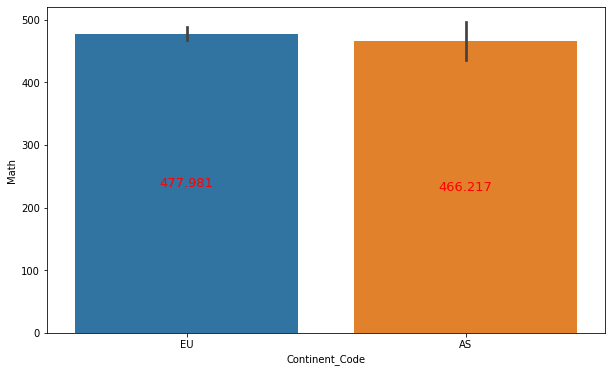

In [54]:
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(x='Continent_Code', y='Math', data=eu_as, ci=95);
for container in ax.containers:
    ax.bar_label(container, color='r', size=13,label_type='center')

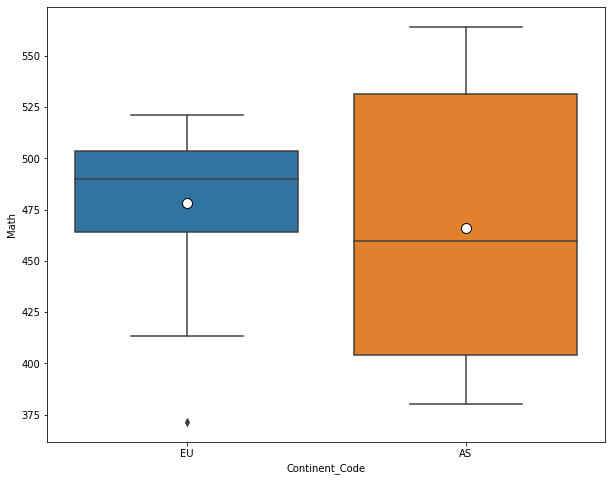

In [55]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(x='Continent_Code', y='Math', data=eu_as,
             showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});

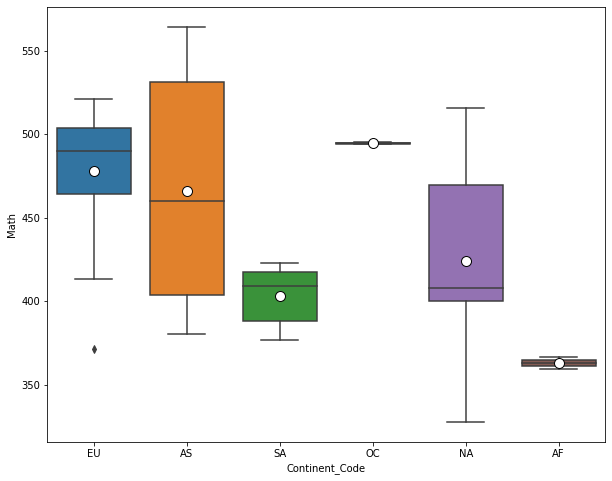

In [56]:
fig, ax=plt.subplots(figsize=(10,8))
ax=sns.boxplot(x='Continent_Code', y='Math', data=df2,
                showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
plt.show()


Even though  the mean math score of EU students is higher compared to AS students. There is not statistically signifcant diffrence of math scores between EU and AS students (t(48)=-0.87, p=0.38)).

#EXERCISE 4. 
 A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [57]:
df3=pd.read_excel('/content/drive/MyDrive/weigth1.xlsx')

In [58]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        15 non-null     int64
 1   starting  15 non-null     int64
 2   ending    15 non-null     int64
dtypes: int64(3)
memory usage: 488.0 bytes


In [59]:
df3.head()

,ID,starting,ending
0,1,76,72
1,2,81,82
2,3,86,84
3,4,71,71
4,5,88,83


In [60]:
df3.describe()

,ID,starting,ending
count,15.000000,15.000000,15.000000
mean,8.000000,79.733333,78.066667
std,4.472136,4.283968,4.605380
min,1.000000,71.000000,70.000000
25%,4.500000,77.000000,75.000000
50%,8.000000,79.000000,79.000000
75%,11.500000,82.000000,82.000000
max,15.000000,88.000000,84.000000


In [61]:
x_bar=79.733
mu=78.066
n=15
s=4.605

In [62]:
relStat=stats.ttest_rel( df3.starting, df3.ending);##paired samples ttest 
relStat.statistic

2.6780834840499255

In [63]:
relStat.pvalue

0.01801293035013252

In [64]:
p_value=stats.t.sf(abs(2.6780834840499255), df=n-1)## negative directional one tailed test 
p_value

0.00900646517506626

In [65]:
alpha=0.01
if p_value < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


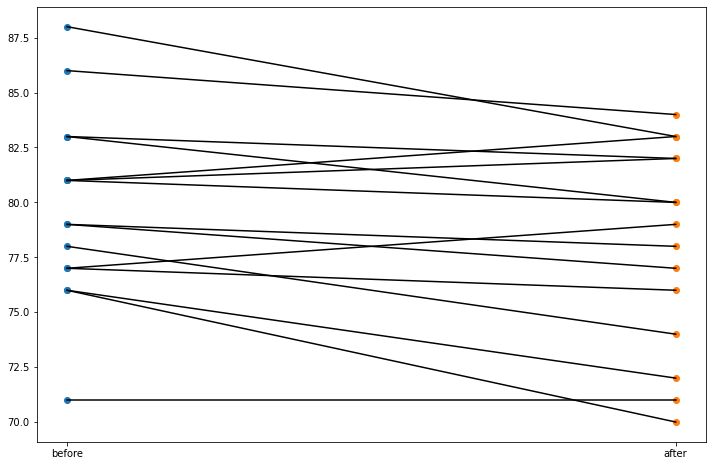

In [66]:
fig, ax=plt.subplots(figsize=(12,8))
ax=plt.scatter(np.zeros(len(df3.starting)), df3.starting)
ax=plt.scatter(np.ones(len(df3.ending)), df3.ending)
# plotting the lines
for i in range(len(df3.starting)):
    plt.plot( [0,1], [df3.starting [i], df3.ending[i]], c='k')

plt.xticks([0,1], ['before', 'after'])

plt.show()

As seen above chart, mean,  t-values, and p-values;the program is sattisticaly significant to be credited to the weight-loss among the sample members.